A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

1) Getting and Cleaning the Data

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

The first column represents the data science topics and the first row represents the choices for each topic.

I use the pandas read_csv method to read the csv file into a pandas dataframe.

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html



In [8]:
import pandas as pd
df=pd.read_csv('https://cocl.us/datascience_survey_data')
df.head()
df.columns = ['Topics','Very Interested','Somewhat Interested','Not Interested']
df.head()

,Topics,Very Interested,Somewhat Interested,Not Interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


2) Matplotlib Barchart

I use the artist layer of Matplotlib to visualize the percentage of the respondents' interest in the different data science topics surveyed.

To create this bar chart, I follow the following steps:

Sort the dataframe in descending order of Very interested.

Convert the numbers into percentages of the total number of respondents. 2,233 respondents completed the survey. Round percentages to 2 decimal places.

As for the chart:

Use a figure size of (20, 8),
bar width of 0.8,
Use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
use font size 14 for the bar labels, percentages, and legend,
use font size 16 for the title, and,
display the percentages above the bars as shown above, and remove the left, top, and right borders.



In [9]:
import pandas as pd

dfsorted=df.sort_values(['Very Interested'], ascending=[False])
dfsorted.head()



,Topics,Very Interested,Somewhat Interested,Not Interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136


In [10]:
dfsorted['Very Interested']=round((dfsorted['Very Interested'] / 2233)*100,2)
dfsorted['Somewhat Interested']=round((dfsorted['Somewhat Interested'] / 2233)*100,2)
dfsorted['Not Interested']=round((dfsorted['Not Interested'] / 2233)*100,2)
dfsorted







,Topics,Very Interested,Somewhat Interested,Not Interested
1,Data Analysis / Statistics,75.59,19.88,2.69
5,Machine Learning,72.95,21.36,3.31
3,Data Visualization,60.01,32.87,4.57
0,Big Data (Spark / Hadoop),59.65,32.65,5.69
4,Deep Learning,56.56,34.48,6.09
2,Data Journalism,19.21,48.41,27.32


[Text(0, 0, 'Data Analysis / Statistics'),
 Text(0, 0, 'Machine Learning'),
 Text(0, 0, 'Data Visualization'),
 Text(0, 0, 'Big Data (Spark / Hadoop)'),
 Text(0, 0, 'Deep Learning'),
 Text(0, 0, 'Data Journalism')]

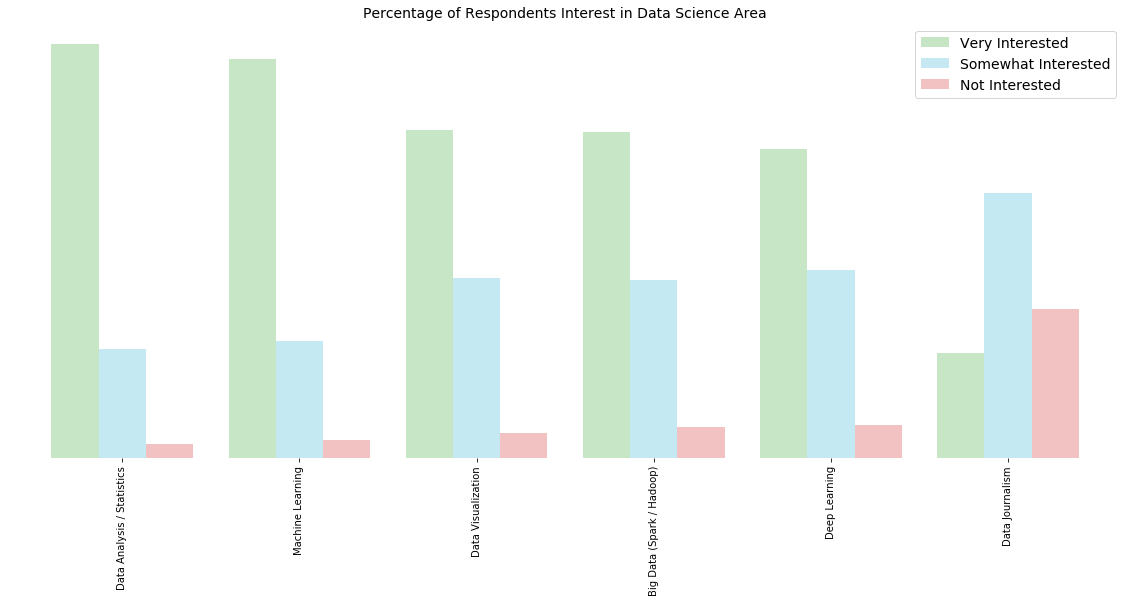

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ax = dfsorted.plot(kind='bar', alpha=0.35, figsize=(20, 8),width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

ax.set_title('Percentage of Respondents Interest in Data Science Area',fontsize=14)
ax.set_ylabel('Number')
ax.set_xlabel('Topics')
ax.legend(fontsize = 14)
ax.set_frame_on(False)
ax.set_xlabel(False).set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_xticklabels(('Data Analysis / Statistics','Machine Learning','Data Visualization','Big Data (Spark / Hadoop)','Deep Learning','Data Journalism'))


3) Dataframe Restructuring

Let's restructure the data so that it is in the right format for a Choropleth map. Essentially we create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset San Francisco consists of 10 main neighborhoods, namely:

Central,
Southern,
Bayview,
Mission,
Park,
Richmond,
Ingleside,
Taraval,
Northern, and,
Tenderloin.

Let's convert the San Francisco dataset, which you can also find here: https://cocl.us/sanfran_crime_dataset, into a pandas dataframe so that represents the total number of crimes in each neighborhood.


In [11]:
import pandas as pd
import numpy as np
df1=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df1.drop(['Category','Descript','DayOfWeek','Date','Time','Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)
df1.rename(columns={'IncidntNum':'Count', 'PdDistrict':'Neighborhood'}, inplace=True)
df1.columns=list(map(str,df1.columns))
df1.set_index('Neighborhood',inplace=True)

df1.sort_values('Count',ascending=False)
df1=df1.groupby('Neighborhood').count()
df1.reset_index(inplace=True)
df1


,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


4) Choropleth map.

We need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco.  
Link: https://cocl.us/sanfran_geojson.

For the map, we make sure that:

it is centred around San Francisco,
I use a zoom level of 12,
fill_color = 'YlOrRd',
fill_opacity = 0.7,
line_opacity=0.2, and,
we define a legend and use the default threshold scale.


In [6]:
import json
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')
from folium import plugins
!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json
print('GeoJSON file downloaded!')


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/utkarsh/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         148 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.0.0-py_0
  branca             conda-forge/noarch::branca-0.3.1-py_0
  folium             conda-forge/noarch::folium-0.5.0-py_0
  vincent            conda-forge/noarch::vincent-0.4.4-py_1

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2019.11.27~ --> conda-forge::ca-certificates-

Folium installed and imported!
/bin/sh: wget: command not found
GeoJSON file downloaded!


In [16]:
world_geo = r'world_countries.json'

latitude = 37.77
longitude = -122.42

world_map = folium.Map(location=[latitude,longitude], zoom_start=12)
folium.Choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crime Rate'
    
).add_to(world_map)
folium.LayerControl().add_to(world_map)
